In [3]:
import tensorflow as tf
from tensorflow.contrib import slim

import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [4]:
targets = np.load('train_label_batch.npy')
outputs = np.load('train_color_batch.npy')

In [5]:
print(targets.shape)
print(outputs.shape)

(9, 129, 129, 8)
(9, 1, 129, 129, 256)


In [69]:
def model(inputs):
    # 1x129x129x8
    logits = slim.conv2d(inputs, num_outputs=8, kernel_size=1, activation_fn=None)
    
    return logits

In [85]:
ckpt_dir = 'tmp/transfer_learning/'

with tf.Graph().as_default():
    tf.logging.set_verbosity(tf.logging.INFO)
    predictions = model(inputs=np.squeeze(outputs))
    
    flat_predictions = tf.reshape(predictions, shape=(-1, 8))
    flat_targets = tf.reshape(targets, shape=(-1, 8))
    
    loss = tf.losses.softmax_cross_entropy(flat_targets, logits=flat_predictions)
    optimizer = tf.train.AdamOptimizer(learning_rate=0.05)
    total_loss = slim.losses.get_total_loss()
    train_op = slim.learning.create_train_op(total_loss=total_loss, optimizer=optimizer)
    
    final_loss = slim.learning.train(train_op,
                                    logdir=ckpt_dir,
                                    number_of_steps=2000,
                                    save_summaries_secs=60,
                                    log_every_n_steps=20)

INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Starting Session.


INFO:tensorflow:Starting Session.


INFO:tensorflow:Saving checkpoint to path tmp/transfer_learning/model.ckpt


INFO:tensorflow:Saving checkpoint to path tmp/transfer_learning/model.ckpt


INFO:tensorflow:Starting Queues.


INFO:tensorflow:Starting Queues.


INFO:tensorflow:global step 20: loss = 0.4139 (0.271 sec/step)


INFO:tensorflow:global step 20: loss = 0.4139 (0.271 sec/step)


INFO:tensorflow:global step 40: loss = 0.2395 (0.212 sec/step)


INFO:tensorflow:global step 40: loss = 0.2395 (0.212 sec/step)


INFO:tensorflow:global step 60: loss = 0.1372 (0.205 sec/step)


INFO:tensorflow:global step 60: loss = 0.1372 (0.205 sec/step)


INFO:tensorflow:global step 80: loss = 0.1135 (0.198 sec/step)


INFO:tensorflow:global step 80: loss = 0.1135 (0.198 sec/step)


INFO:tensorflow:global step 100: loss = 0.1011 (0.202 sec/step)


INFO:tensorflow:global step 100: loss = 0.1011 (0.202 sec/step)


INFO:tensorflow:global step 120: loss = 0.0940 (0.215 sec/step)


INFO:tensorflow:global step 120: loss = 0.0940 (0.215 sec/step)


INFO:tensorflow:global step 140: loss = 0.0884 (0.205 sec/step)


INFO:tensorflow:global step 140: loss = 0.0884 (0.205 sec/step)


INFO:tensorflow:global step 160: loss = 0.0833 (0.198 sec/step)


INFO:tensorflow:global step 160: loss = 0.0833 (0.198 sec/step)


INFO:tensorflow:global step 180: loss = 0.0784 (0.202 sec/step)


INFO:tensorflow:global step 180: loss = 0.0784 (0.202 sec/step)


INFO:tensorflow:global step 200: loss = 0.0736 (0.205 sec/step)


INFO:tensorflow:global step 200: loss = 0.0736 (0.205 sec/step)


INFO:tensorflow:global step 220: loss = 0.0706 (0.221 sec/step)


INFO:tensorflow:global step 220: loss = 0.0706 (0.221 sec/step)


INFO:tensorflow:global step 240: loss = 0.0689 (0.195 sec/step)


INFO:tensorflow:global step 240: loss = 0.0689 (0.195 sec/step)


INFO:tensorflow:global step 260: loss = 0.0675 (0.243 sec/step)


INFO:tensorflow:global step 260: loss = 0.0675 (0.243 sec/step)


INFO:tensorflow:global step 280: loss = 0.0662 (0.233 sec/step)


INFO:tensorflow:global step 280: loss = 0.0662 (0.233 sec/step)


INFO:tensorflow:global step 300: loss = 0.0650 (0.197 sec/step)


INFO:tensorflow:global step 300: loss = 0.0650 (0.197 sec/step)


INFO:tensorflow:global step 320: loss = 0.0639 (0.189 sec/step)


INFO:tensorflow:global step 320: loss = 0.0639 (0.189 sec/step)


INFO:tensorflow:global step 340: loss = 0.0629 (0.194 sec/step)


INFO:tensorflow:global step 340: loss = 0.0629 (0.194 sec/step)


INFO:tensorflow:global step 360: loss = 0.0619 (0.214 sec/step)


INFO:tensorflow:global step 360: loss = 0.0619 (0.214 sec/step)


INFO:tensorflow:global step 380: loss = 0.0609 (0.201 sec/step)


INFO:tensorflow:global step 380: loss = 0.0609 (0.201 sec/step)


INFO:tensorflow:global step 400: loss = 0.0600 (0.218 sec/step)


INFO:tensorflow:global step 400: loss = 0.0600 (0.218 sec/step)


INFO:tensorflow:global step 420: loss = 0.0591 (0.198 sec/step)


INFO:tensorflow:global step 420: loss = 0.0591 (0.198 sec/step)


INFO:tensorflow:global step 440: loss = 0.0582 (0.194 sec/step)


INFO:tensorflow:global step 440: loss = 0.0582 (0.194 sec/step)


INFO:tensorflow:global step 460: loss = 0.0576 (0.198 sec/step)


INFO:tensorflow:global step 460: loss = 0.0576 (0.198 sec/step)


INFO:tensorflow:global step 480: loss = 0.0571 (0.208 sec/step)


INFO:tensorflow:global step 480: loss = 0.0571 (0.208 sec/step)


INFO:tensorflow:global step 500: loss = 0.0567 (0.202 sec/step)


INFO:tensorflow:global step 500: loss = 0.0567 (0.202 sec/step)


INFO:tensorflow:global step 520: loss = 0.0562 (0.206 sec/step)


INFO:tensorflow:global step 520: loss = 0.0562 (0.206 sec/step)


INFO:tensorflow:global step 540: loss = 0.0558 (0.202 sec/step)


INFO:tensorflow:global step 540: loss = 0.0558 (0.202 sec/step)


INFO:tensorflow:global step 560: loss = 0.0555 (0.194 sec/step)


INFO:tensorflow:global step 560: loss = 0.0555 (0.194 sec/step)


INFO:tensorflow:global step 580: loss = 0.0552 (0.206 sec/step)


INFO:tensorflow:global step 580: loss = 0.0552 (0.206 sec/step)


INFO:tensorflow:global step 600: loss = 0.0550 (0.212 sec/step)


INFO:tensorflow:global step 600: loss = 0.0550 (0.212 sec/step)


INFO:tensorflow:global step 620: loss = 0.0548 (0.196 sec/step)


INFO:tensorflow:global step 620: loss = 0.0548 (0.196 sec/step)


INFO:tensorflow:global step 640: loss = 0.0545 (0.197 sec/step)


INFO:tensorflow:global step 640: loss = 0.0545 (0.197 sec/step)


INFO:tensorflow:global step 660: loss = 0.0543 (0.206 sec/step)


INFO:tensorflow:global step 660: loss = 0.0543 (0.206 sec/step)


INFO:tensorflow:global step 680: loss = 0.0541 (0.197 sec/step)


INFO:tensorflow:global step 680: loss = 0.0541 (0.197 sec/step)


INFO:tensorflow:global step 700: loss = 0.0540 (0.200 sec/step)


INFO:tensorflow:global step 700: loss = 0.0540 (0.200 sec/step)


INFO:tensorflow:global step 720: loss = 0.0538 (0.195 sec/step)


INFO:tensorflow:global step 720: loss = 0.0538 (0.195 sec/step)


INFO:tensorflow:global step 740: loss = 0.0536 (0.266 sec/step)


INFO:tensorflow:global step 740: loss = 0.0536 (0.266 sec/step)


INFO:tensorflow:global step 760: loss = 0.0535 (0.202 sec/step)


INFO:tensorflow:global step 760: loss = 0.0535 (0.202 sec/step)


INFO:tensorflow:global step 780: loss = 0.0533 (0.287 sec/step)


INFO:tensorflow:global step 780: loss = 0.0533 (0.287 sec/step)


INFO:tensorflow:global step 800: loss = 0.0532 (0.211 sec/step)


INFO:tensorflow:global step 800: loss = 0.0532 (0.211 sec/step)


INFO:tensorflow:global step 820: loss = 0.0530 (0.199 sec/step)


INFO:tensorflow:global step 820: loss = 0.0530 (0.199 sec/step)


INFO:tensorflow:global step 840: loss = 0.0529 (0.198 sec/step)


INFO:tensorflow:global step 840: loss = 0.0529 (0.198 sec/step)


INFO:tensorflow:global step 860: loss = 0.0528 (0.209 sec/step)


INFO:tensorflow:global step 860: loss = 0.0528 (0.209 sec/step)


INFO:tensorflow:global step 880: loss = 0.0526 (0.193 sec/step)


INFO:tensorflow:global step 880: loss = 0.0526 (0.193 sec/step)


INFO:tensorflow:global step 900: loss = 0.0525 (0.195 sec/step)


INFO:tensorflow:global step 900: loss = 0.0525 (0.195 sec/step)


INFO:tensorflow:global step 920: loss = 0.0524 (0.202 sec/step)


INFO:tensorflow:global step 920: loss = 0.0524 (0.202 sec/step)


INFO:tensorflow:global step 940: loss = 0.0523 (0.193 sec/step)


INFO:tensorflow:global step 940: loss = 0.0523 (0.193 sec/step)


INFO:tensorflow:global step 960: loss = 0.0522 (0.200 sec/step)


INFO:tensorflow:global step 960: loss = 0.0522 (0.200 sec/step)


INFO:tensorflow:global step 980: loss = 0.0521 (0.199 sec/step)


INFO:tensorflow:global step 980: loss = 0.0521 (0.199 sec/step)


INFO:tensorflow:global step 1000: loss = 0.0521 (0.195 sec/step)


INFO:tensorflow:global step 1000: loss = 0.0521 (0.195 sec/step)


INFO:tensorflow:global step 1020: loss = 0.0520 (0.193 sec/step)


INFO:tensorflow:global step 1020: loss = 0.0520 (0.193 sec/step)


INFO:tensorflow:global step 1040: loss = 0.0519 (0.201 sec/step)


INFO:tensorflow:global step 1040: loss = 0.0519 (0.201 sec/step)


INFO:tensorflow:global step 1060: loss = 0.0518 (0.197 sec/step)


INFO:tensorflow:global step 1060: loss = 0.0518 (0.197 sec/step)


INFO:tensorflow:global step 1080: loss = 0.0517 (0.199 sec/step)


INFO:tensorflow:global step 1080: loss = 0.0517 (0.199 sec/step)


INFO:tensorflow:global step 1100: loss = 0.0517 (0.198 sec/step)


INFO:tensorflow:global step 1100: loss = 0.0517 (0.198 sec/step)


INFO:tensorflow:global step 1120: loss = 0.0516 (0.195 sec/step)


INFO:tensorflow:global step 1120: loss = 0.0516 (0.195 sec/step)


INFO:tensorflow:global step 1140: loss = 0.0515 (0.194 sec/step)


INFO:tensorflow:global step 1140: loss = 0.0515 (0.194 sec/step)


INFO:tensorflow:global step 1160: loss = 0.0515 (0.200 sec/step)


INFO:tensorflow:global step 1160: loss = 0.0515 (0.200 sec/step)


INFO:tensorflow:global step 1180: loss = 0.0514 (0.194 sec/step)


INFO:tensorflow:global step 1180: loss = 0.0514 (0.194 sec/step)


INFO:tensorflow:global step 1200: loss = 0.0514 (0.196 sec/step)


INFO:tensorflow:global step 1200: loss = 0.0514 (0.196 sec/step)


INFO:tensorflow:global step 1220: loss = 0.0513 (0.208 sec/step)


INFO:tensorflow:global step 1220: loss = 0.0513 (0.208 sec/step)


INFO:tensorflow:global step 1240: loss = 0.0512 (0.249 sec/step)


INFO:tensorflow:global step 1240: loss = 0.0512 (0.249 sec/step)


INFO:tensorflow:global step 1260: loss = 0.0512 (0.220 sec/step)


INFO:tensorflow:global step 1260: loss = 0.0512 (0.220 sec/step)


INFO:tensorflow:global step 1280: loss = 0.0511 (0.286 sec/step)


INFO:tensorflow:global step 1280: loss = 0.0511 (0.286 sec/step)


INFO:tensorflow:global step 1300: loss = 0.0511 (0.256 sec/step)


INFO:tensorflow:global step 1300: loss = 0.0511 (0.256 sec/step)


INFO:tensorflow:global step 1320: loss = 0.0510 (0.263 sec/step)


INFO:tensorflow:global step 1320: loss = 0.0510 (0.263 sec/step)


INFO:tensorflow:global step 1340: loss = 0.0510 (0.203 sec/step)


INFO:tensorflow:global step 1340: loss = 0.0510 (0.203 sec/step)


INFO:tensorflow:global step 1360: loss = 0.0509 (0.189 sec/step)


INFO:tensorflow:global step 1360: loss = 0.0509 (0.189 sec/step)


INFO:tensorflow:global step 1380: loss = 0.0509 (0.198 sec/step)


INFO:tensorflow:global step 1380: loss = 0.0509 (0.198 sec/step)


INFO:tensorflow:global step 1400: loss = 0.0508 (0.208 sec/step)


INFO:tensorflow:global step 1400: loss = 0.0508 (0.208 sec/step)


INFO:tensorflow:global step 1420: loss = 0.0508 (0.204 sec/step)


INFO:tensorflow:global step 1420: loss = 0.0508 (0.204 sec/step)


INFO:tensorflow:global step 1440: loss = 0.0507 (0.192 sec/step)


INFO:tensorflow:global step 1440: loss = 0.0507 (0.192 sec/step)


INFO:tensorflow:global step 1460: loss = 0.0507 (0.292 sec/step)


INFO:tensorflow:global step 1460: loss = 0.0507 (0.292 sec/step)


INFO:tensorflow:global step 1480: loss = 0.0507 (0.222 sec/step)


INFO:tensorflow:global step 1480: loss = 0.0507 (0.222 sec/step)


INFO:tensorflow:global step 1500: loss = 0.0506 (0.227 sec/step)


INFO:tensorflow:global step 1500: loss = 0.0506 (0.227 sec/step)


INFO:tensorflow:global step 1520: loss = 0.0506 (0.205 sec/step)


INFO:tensorflow:global step 1520: loss = 0.0506 (0.205 sec/step)


INFO:tensorflow:global step 1540: loss = 0.0505 (0.204 sec/step)


INFO:tensorflow:global step 1540: loss = 0.0505 (0.204 sec/step)


INFO:tensorflow:global step 1560: loss = 0.0505 (0.277 sec/step)


INFO:tensorflow:global step 1560: loss = 0.0505 (0.277 sec/step)


INFO:tensorflow:global step 1580: loss = 0.0505 (0.257 sec/step)


INFO:tensorflow:global step 1580: loss = 0.0505 (0.257 sec/step)


INFO:tensorflow:global step 1600: loss = 0.0504 (0.225 sec/step)


INFO:tensorflow:global step 1600: loss = 0.0504 (0.225 sec/step)


INFO:tensorflow:global step 1620: loss = 0.0506 (0.204 sec/step)


INFO:tensorflow:global step 1620: loss = 0.0506 (0.204 sec/step)


INFO:tensorflow:global step 1640: loss = 0.0506 (0.192 sec/step)


INFO:tensorflow:global step 1640: loss = 0.0506 (0.192 sec/step)


INFO:tensorflow:global step 1660: loss = 0.0503 (0.193 sec/step)


INFO:tensorflow:global step 1660: loss = 0.0503 (0.193 sec/step)


INFO:tensorflow:global step 1680: loss = 0.0503 (0.241 sec/step)


INFO:tensorflow:global step 1680: loss = 0.0503 (0.241 sec/step)


INFO:tensorflow:global step 1700: loss = 0.0504 (0.321 sec/step)


INFO:tensorflow:global step 1700: loss = 0.0504 (0.321 sec/step)


INFO:tensorflow:global step 1720: loss = 0.0502 (0.275 sec/step)


INFO:tensorflow:global step 1720: loss = 0.0502 (0.275 sec/step)


INFO:tensorflow:global step 1740: loss = 0.0506 (0.249 sec/step)


INFO:tensorflow:global step 1740: loss = 0.0506 (0.249 sec/step)


INFO:tensorflow:global step 1760: loss = 0.0501 (0.229 sec/step)


INFO:tensorflow:global step 1760: loss = 0.0501 (0.229 sec/step)


INFO:tensorflow:global step 1780: loss = 0.0503 (0.237 sec/step)


INFO:tensorflow:global step 1780: loss = 0.0503 (0.237 sec/step)


INFO:tensorflow:global step 1800: loss = 0.0506 (0.191 sec/step)


INFO:tensorflow:global step 1800: loss = 0.0506 (0.191 sec/step)


INFO:tensorflow:global step 1820: loss = 0.0503 (0.200 sec/step)


INFO:tensorflow:global step 1820: loss = 0.0503 (0.200 sec/step)


INFO:tensorflow:global step 1840: loss = 0.0501 (0.204 sec/step)


INFO:tensorflow:global step 1840: loss = 0.0501 (0.204 sec/step)


INFO:tensorflow:global step 1860: loss = 0.0503 (0.232 sec/step)


INFO:tensorflow:global step 1860: loss = 0.0503 (0.232 sec/step)


INFO:tensorflow:global step 1880: loss = 0.0501 (0.344 sec/step)


INFO:tensorflow:global step 1880: loss = 0.0501 (0.344 sec/step)


INFO:tensorflow:global step 1900: loss = 0.0499 (0.224 sec/step)


INFO:tensorflow:global step 1900: loss = 0.0499 (0.224 sec/step)


INFO:tensorflow:global step 1920: loss = 0.0502 (0.189 sec/step)


INFO:tensorflow:global step 1920: loss = 0.0502 (0.189 sec/step)


INFO:tensorflow:global step 1940: loss = 0.0499 (0.188 sec/step)


INFO:tensorflow:global step 1940: loss = 0.0499 (0.188 sec/step)


INFO:tensorflow:global step 1960: loss = 0.0500 (0.203 sec/step)


INFO:tensorflow:global step 1960: loss = 0.0500 (0.203 sec/step)


INFO:tensorflow:global step 1980: loss = 0.0502 (0.196 sec/step)


INFO:tensorflow:global step 1980: loss = 0.0502 (0.196 sec/step)


INFO:tensorflow:global step 2000: loss = 0.0498 (0.215 sec/step)


INFO:tensorflow:global step 2000: loss = 0.0498 (0.215 sec/step)


INFO:tensorflow:Stopping Training.


INFO:tensorflow:Stopping Training.


INFO:tensorflow:Finished training! Saving model to disk.


INFO:tensorflow:Finished training! Saving model to disk.


In [117]:
oooooouput = np.squeeze(outputs)[7]

In [118]:
with tf.Graph().as_default():
    predictions = model(inputs=np.array([oooooouput]))
    
    upsampled_logits = tf.image.resize_bilinear(images=predictions, size=(513, 513), align_corners=True)
    prediction = tf.argmax(upsampled_logits, axis=3)
    seg_map_tensor = tf.slice(input_=prediction, begin=(0, 0, 0), size=[1, 513, 513])
    
    variables_to_restore = slim.get_variables_to_restore()
    restorer = tf.train.Saver()
    
    with tf.Session() as sess:
        restorer.restore(sess, 'tmp/transfer_learning/model.ckpt')
        result = sess.run(seg_map_tensor)
        
#     sv = tf.train.Supervisor(logdir=ckpt_dir)
#     with sv.managed_session() as sess:
#         result = sess.run(seg_map_tensor)

INFO:tensorflow:Restoring parameters from tmp/transfer_learning/model.ckpt


INFO:tensorflow:Restoring parameters from tmp/transfer_learning/model.ckpt


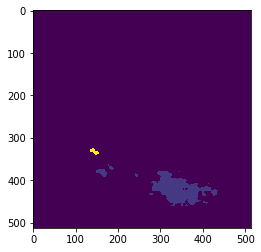

In [119]:
plt.imshow(result[0])

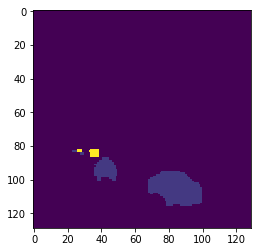

In [120]:
plt.imshow(np.argmax(targets[7], axis=2))